


## Smartphone-Based Recognition of Human Activities and Postural Transitions [15]

The dataset is then divided in two parts and they can be used separately.  



1. Inertial sensor data 

- Raw triaxial signals from the accelerometer and gyroscope of all the trials with with participants. 

- The labels of all the performed activities.

  

2. Records of activity windows. Each one composed of:

- A 561-feature vector with time and frequency domain variables. 

- Its associated activity label. 

- An identifier of the subject who carried out the experiment.



The dataset includes the following files:

=========================================



- 'README.txt'



- 'RawData/acc_expXX_userYY.txt': The raw triaxial acceleration signal for the experiment number XX and associated to the user number YY. Every row is one acceleration sample (three axis) captured at a frequency of 50Hz. 



- 'RawData/gyro_expXX_userYY.txt': The raw triaxial angular speed signal for the experiment number XX and associated to the user number YY. Every row is one angular velocity sample (three axis) captured at a frequency of 50Hz. 



- 'RawData/labels.txt': include all the activity labels available for the dataset (1 per row). 

   Column 1: experiment number ID, 

   Column 2: user number ID, 

   Column 3: activity number ID 

   Column 4: Label start point (in number of signal log samples (recorded at 50Hz))

   Column 5: Label end point (in number of signal log samples)



- 'features_info.txt': Shows information about the variables used on the feature vector.



- 'features.txt': List of all features.



- 'activity_labels.txt': Links the activity ID with their activity name.



- 'Train/X_train.txt': Training set.


- 'Train/y_train.txt': Training labels.



- 'Test/X_test.txt': Test set.



- 'Test/y_test.txt': Test labels.



- 'Train/subject_id_train.txt': Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 



- 'Test/subject_id_test.txt': Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 



Notes: 

======



- Features are normalized and bounded within [-1,1].

- Each feature vector is a row on the 'X' and 'y' files.

- The units used for the accelerations (total and body) are 'g's (gravity of earth -> 9.80665 m/seg2).

- The gyroscope units are rad/seg.

- A video of the experiment including an example of the 6 recorded activities with one of the participants can be seen in the following link: http://www.youtube.com/watch?v=XOEN9W05_4A


In [1]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys
import re
from matplotlib.pyplot import figure

In [2]:
test_df = pd.read_csv('/home/jm/vscode/Python/pytorch/Fall Dectection/smartphone activity detection/test.csv')
test_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [3]:
train_df = pd.read_csv('/home/jm/vscode/Python/pytorch/Fall Dectection/smartphone activity detection/train.csv')
train_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4480,0.280455,-0.023074,-0.053118,-0.083037,-0.024339,-0.280458,-0.082313,-0.158023,-0.324004,0.002698,...,0.078079,-0.099059,-0.410601,-0.749923,-0.826885,-0.764282,0.245406,-0.053885,22.0,WALKING
4481,0.232012,-0.012817,-0.108856,-0.069237,-0.031138,-0.292701,-0.080835,-0.136336,-0.365016,0.014091,...,0.205382,0.951256,0.318380,-0.898899,-0.407278,-0.764633,0.240318,-0.063632,22.0,WALKING
4482,0.333258,-0.001307,-0.166581,-0.034498,-0.062471,-0.283268,-0.059698,-0.174912,-0.338661,0.283234,...,0.048713,-0.191360,-0.580316,-0.423810,0.689597,-0.765469,0.237371,-0.067771,22.0,WALKING
4483,0.250267,-0.024771,-0.115184,-0.082664,-0.091798,-0.270690,-0.087819,-0.219171,-0.283443,0.283234,...,0.238952,0.482225,0.073668,0.750983,0.660631,-0.770058,0.238545,-0.058942,22.0,WALKING


In [4]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    1
angle(Y,gravityMean)    1
angle(Z,gravityMean)    1
subject                 1
Activity                1
Length: 563, dtype: int64
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [5]:
train_df = train_df.iloc[:-1] #drop last row to get rid of null data
test_df = test_df.iloc[:-1] #drop last row to get rid of null data

In [6]:
print('----------------train data----------------\n',
      train_df.isnull().sum(),'\n')

print('----------------test data----------------\n',
      test_df.isnull().sum())

----------------train data----------------
 tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64 

----------------test data----------------
 tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [7]:
print('----------------train data----------------\n',
      train_df.Activity.value_counts(),'\n')

print('----------------test data----------------\n',
      test_df.Activity.value_counts(),'\n')

----------------train data----------------
 Activity
LAYING                858
STANDING              842
SITTING               781
WALKING               771
WALKING_UPSTAIRS      644
WALKING_DOWNSTAIRS    588
Name: count, dtype: int64 

----------------test data----------------
 Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      470
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64 



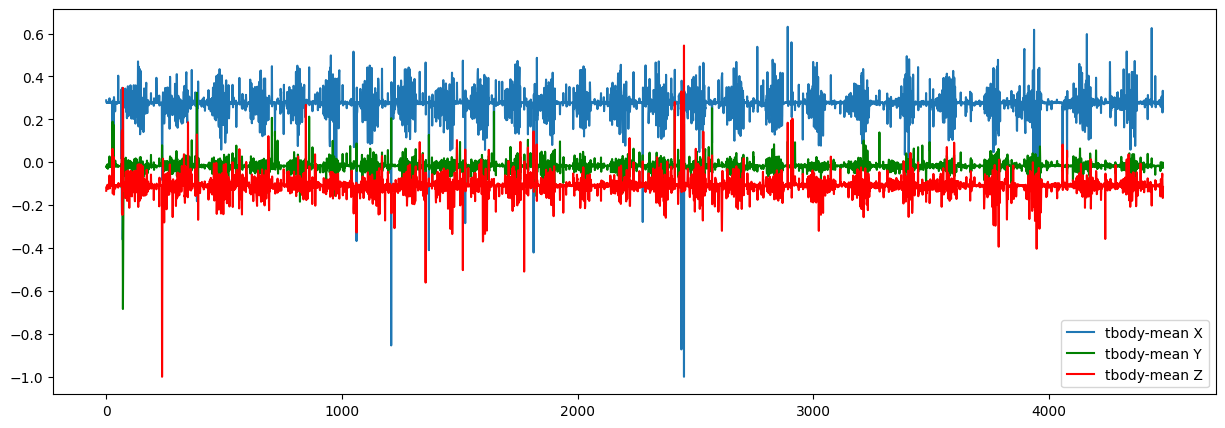

In [13]:
plt.figure(figsize=(15,5))
plt.plot(train_df['tBodyAcc-mean()-X'], label='tbody-mean X')
plt.plot(train_df['tBodyAcc-mean()-Y'], color='green', label='tbody-mean Y')
plt.plot(train_df['tBodyAcc-mean()-Z'], color='red', label='tbody-mean Z')
plt.legend()

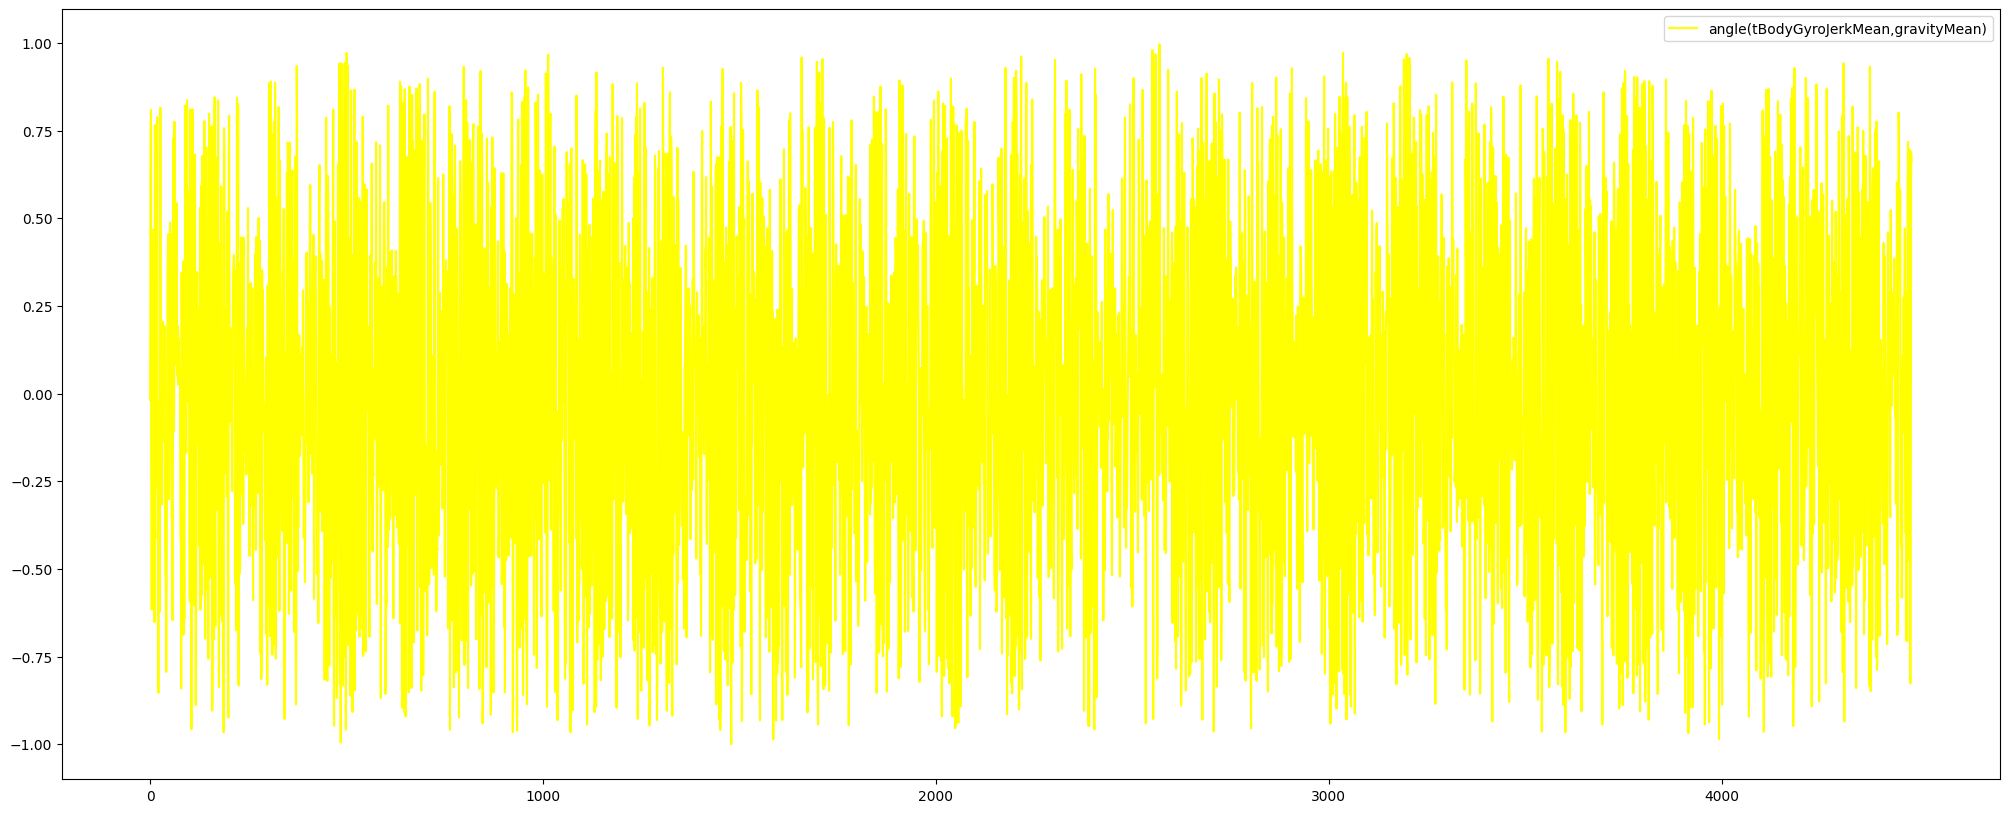

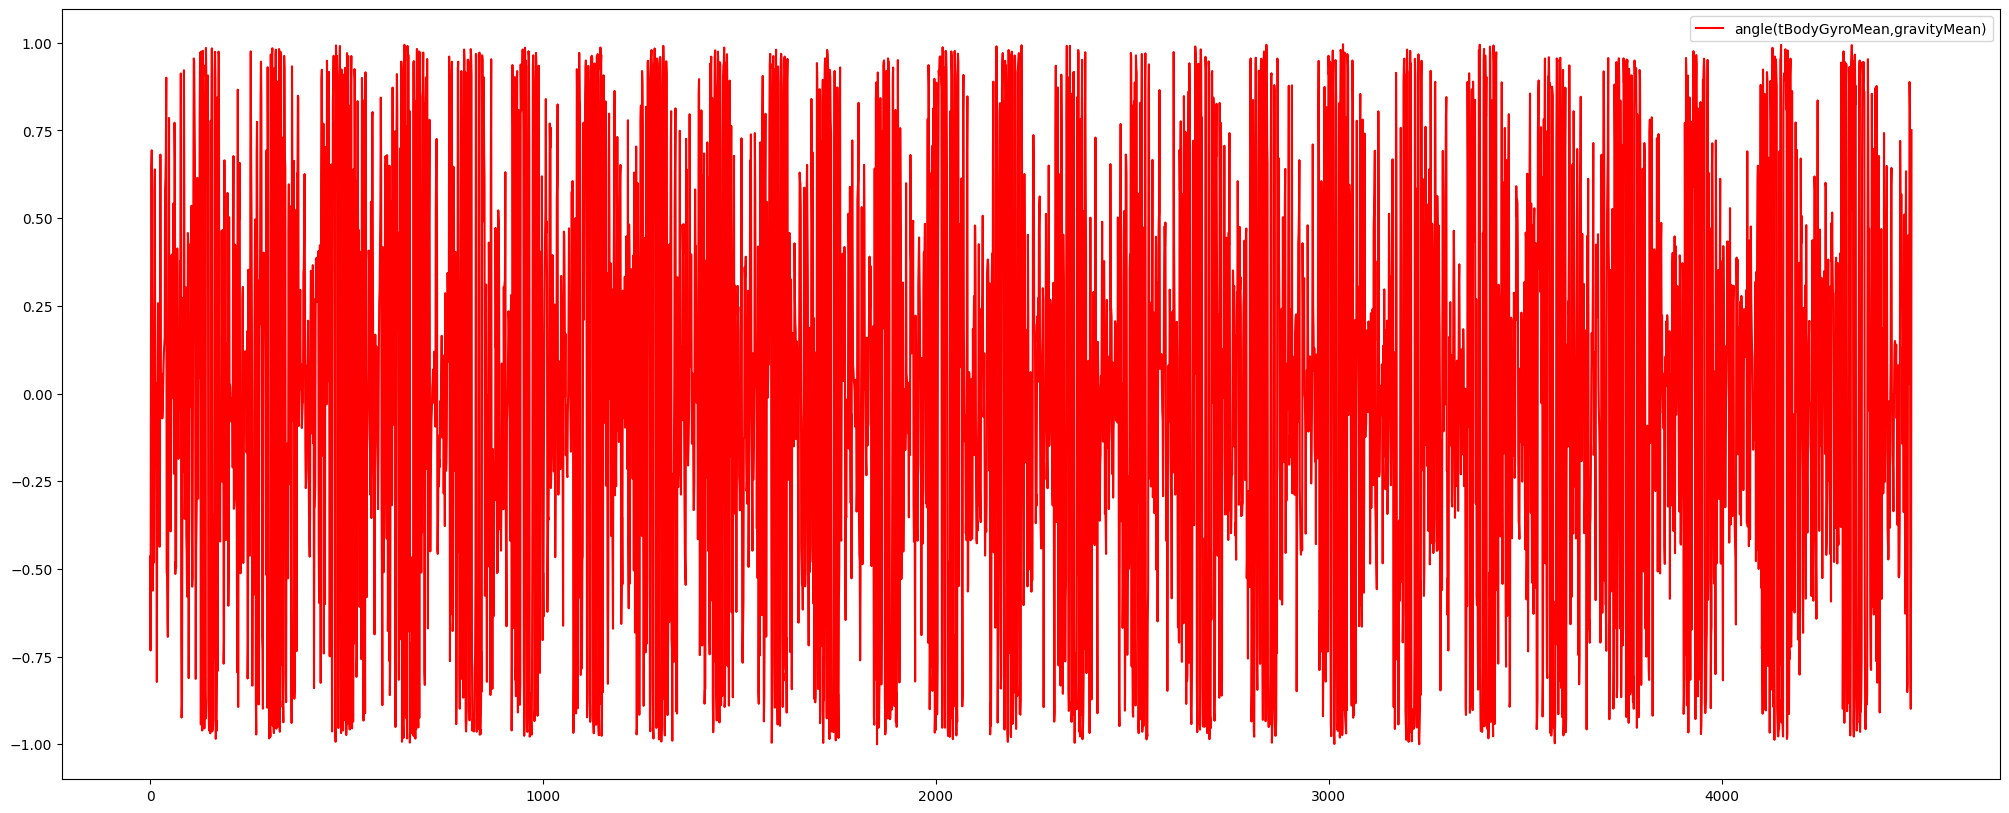

<function matplotlib.pyplot.show(close=None, block=None)>

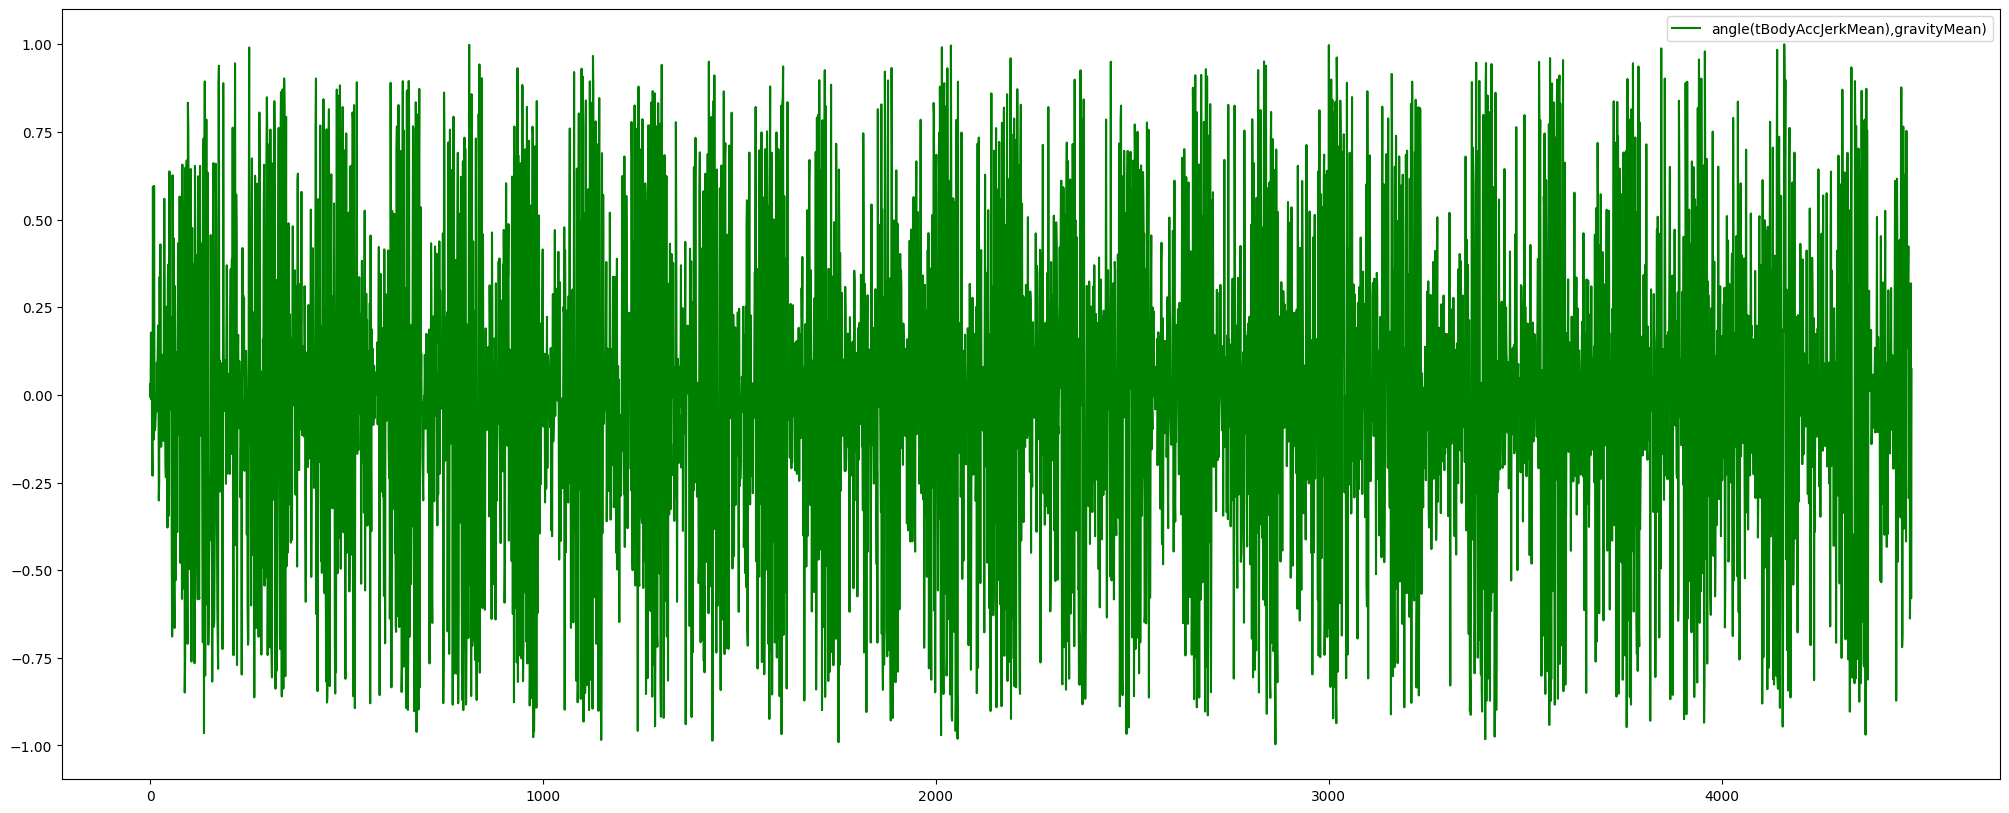

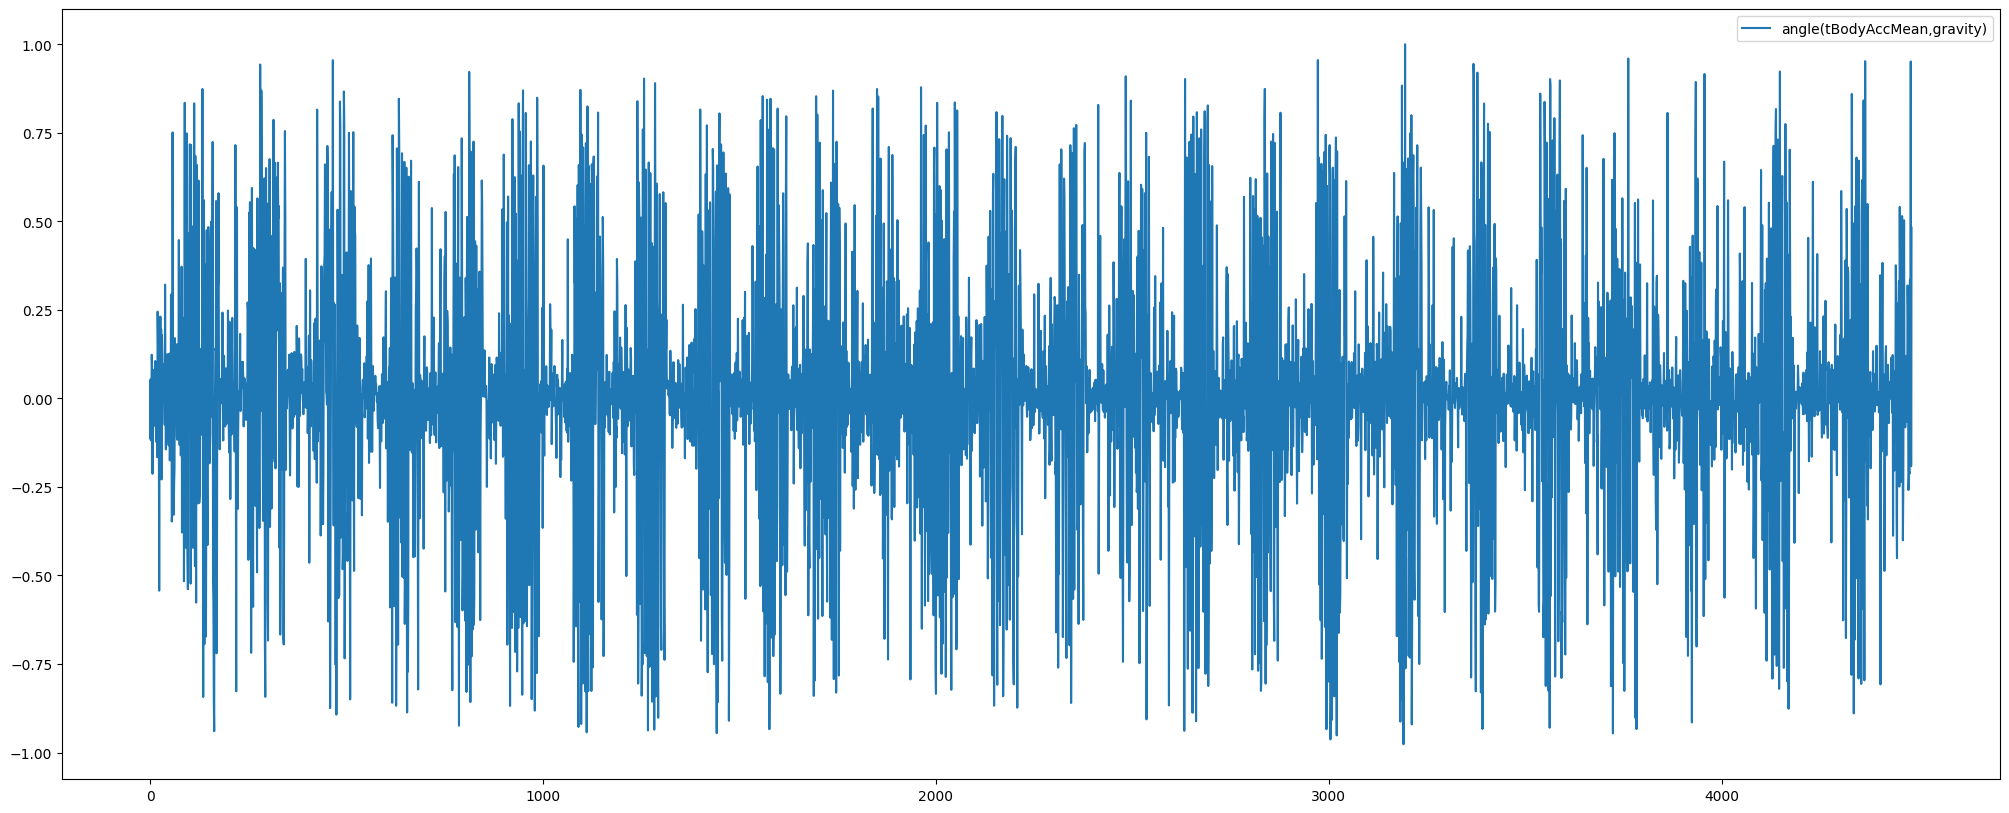

In [19]:
plt.figure(figsize=(25,10))
plt.plot(train_df['angle(tBodyGyroJerkMean,gravityMean)'], color='yellow', label='angle(tBodyGyroJerkMean,gravityMean)')
plt.legend()
plt.show()

plt.figure(figsize=(25,10))
plt.plot(train_df['angle(tBodyGyroMean,gravityMean)'], color='red', label='angle(tBodyGyroMean,gravityMean)')
plt.legend()
plt.show()

plt.figure(figsize=(25,10))
plt.plot(train_df['angle(tBodyAccJerkMean),gravityMean)'], color='green', label='angle(tBodyAccJerkMean),gravityMean)')
plt.legend()
plt.show

plt.figure(figsize=(25,10))
plt.plot(train_df['angle(tBodyAccMean,gravity)'], label='angle(tBodyAccMean,gravity)')
plt.legend()
plt.show	

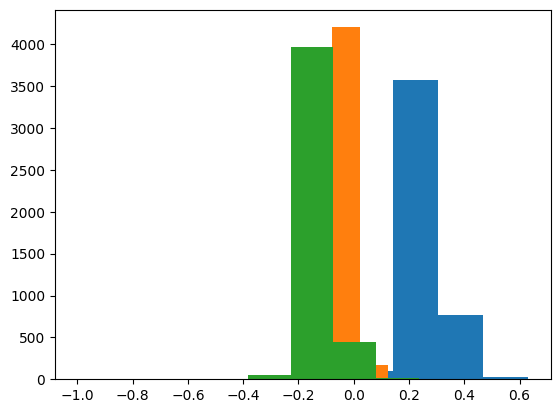

In [20]:
plt.hist(train_df['tBodyAcc-mean()-X'])
plt.hist(train_df['tBodyAcc-mean()-Y'])
plt.hist(train_df['tBodyAcc-mean()-Z'])
plt.show()

In [ ]:
def plot_comparison(data, metric = 'acceleration'):
 
  metric = metric[0].lower()
  data = data
   
  for i in range(0,13):
    plt.figure(figsize=(16,4))
 
    plt.subplot(1,2,1)
    plt.plot(data[ data['label']==i ].reset_index(drop=True)['lower left ankle acceleration X-axis'], alpha=.7, label='lower left ankle acceleration X-axis')
    plt.plot(data[ data['label']==i ].reset_index(drop=True)['lower left ankle acceleration Y-axis'],color='red', alpha=.7, label='lower left ankle acceleration Y-axis')
    plt.plot(data[ data['label']==i ].reset_index(drop=True)['lower left ankle acceleration Z-axis'],color='green', alpha=.7, label='lower left ankle acceleration Z-axis')
    plt.title(f'{label_map[i]} - left-ankle')
    plt.legend()  
 
    plt.subplot(1,2,2)
    plt.plot(data[ data['label']==i ].reset_index(drop=True)['lower right arm acceleration X-axis'], alpha=.7, label='lower right arm acceleration X-axis')
    plt.plot(data[ data['label']==i ].reset_index(drop=True)['lower right arm acceleration Y-axis'],color='red', alpha=.7, label='lower right arm acceleration Y-axis')
    plt.plot(data[ data['label']==i ].reset_index(drop=True)['lower right arm acceleration Z-axis'],color='green', alpha=.7, label='lower right arm acceleration Z-axis')
    plt.title(f'{label_map[i]} - right-lower-arm')
    plt.legend() 
 
    plt.show()
    print()